# GRAB SAFETY CHALLENGE - Programming with Data Project
## Step 1 Data Pre-processing

In [1]:
#Essential Imports
import numpy as np
import pandas as pd
import os
import glob
import matplotlib.pyplot as plt
import seaborn as sns

In [54]:
#Models
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
import xgboost as XGBClassifier
import xgboost as xgb
from sklearn.neighbors import KNeighborsClassifier

#Others
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from imblearn.over_sampling import SMOTE

#### Next, put all our data files into panda dataframes. There are 10 telematics csv files and 1 label csv file (dangerous trips are labled as 1)

In [3]:
df1 = pd.read_csv('C:\\Users\\sizhao\\Documents\\safety - Grab\\safety\\features\\part-00000-e6120af0-10c2-4248-97c4-81baf4304e5c-c000.csv')
df2 = pd.read_csv('C:\\Users\\sizhao\\Documents\\safety - Grab\\safety\\features\\part-00001-e6120af0-10c2-4248-97c4-81baf4304e5c-c000.csv')
df3 = pd.read_csv('C:\\Users\\sizhao\\Documents\\safety - Grab\\safety\\features\\part-00002-e6120af0-10c2-4248-97c4-81baf4304e5c-c000.csv')
df4 = pd.read_csv('C:\\Users\\sizhao\\Documents\\safety - Grab\\safety\\features\\part-00003-e6120af0-10c2-4248-97c4-81baf4304e5c-c000.csv')
df5 = pd.read_csv('C:\\Users\\sizhao\\Documents\\safety - Grab\\safety\\features\\part-00004-e6120af0-10c2-4248-97c4-81baf4304e5c-c000.csv')
df6 = pd.read_csv('C:\\Users\\sizhao\\Documents\\safety - Grab\\safety\\features\\part-00005-e6120af0-10c2-4248-97c4-81baf4304e5c-c000.csv')
df7 = pd.read_csv('C:\\Users\\sizhao\\Documents\\safety - Grab\\safety\\features\\part-00006-e6120af0-10c2-4248-97c4-81baf4304e5c-c000.csv')
df8 = pd.read_csv('C:\\Users\\sizhao\\Documents\\safety - Grab\\safety\\features\\part-00007-e6120af0-10c2-4248-97c4-81baf4304e5c-c000.csv')
df9 = pd.read_csv('C:\\Users\\sizhao\\Documents\\safety - Grab\\safety\\features\\part-00008-e6120af0-10c2-4248-97c4-81baf4304e5c-c000.csv')
df10 = pd.read_csv('C:\\Users\\sizhao\\Documents\\safety - Grab\\safety\\features\\part-00009-e6120af0-10c2-4248-97c4-81baf4304e5c-c000.csv')

In [4]:
# Combine the 10 telematics csv files
train = pd.concat([df1, df2, df3, df4, df5, df6, df7, df8, df9, df10], ignore_index=True)

In [5]:
labels = pd.read_csv('C:\\Users\\sizhao\\Documents\\safety - Grab\\safety\\labels\\part-00000-e9445087-aa0a-433b-a7f6-7f4c19d78ad6-c000.csv')

In [6]:
# Take a look of how our sample looks like
np.random.seed(888)
train.sample(5)

,bookingID,Accuracy,Bearing,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z,second,Speed
9763853,996432412675,50.0,55.392185,-0.071777,-9.611584,-0.580350,-0.006011,0.021981,0.009657,1340.0,-1.000000
3640231,326417514507,3.9,108.000000,0.262848,8.533295,-1.065842,-0.005386,-0.001816,-0.013153,778.0,26.430000
11071810,1322849927222,3.9,200.000000,1.209109,9.775824,-1.161223,-0.059534,-0.040829,0.015612,591.0,9.072603
12780796,1443109011529,5.0,150.972092,-0.273950,-10.500577,0.750671,-0.025540,-0.002198,0.000697,1009.0,2.270000
10512849,249108103270,5.0,45.000000,0.394445,8.865130,-0.888249,0.174171,0.018642,-0.014381,651.0,21.095022


In [7]:
train.shape

(16135561, 11)

In [8]:
np.random.seed(888)
labels.sample(5)

,bookingID,label
9138,1099511627822,0
18351,1357209665609,0
2480,317827579997,0
918,283467841675,1
4509,1443109011504,0


In [9]:
labels.shape

(20018, 2)

## Step 2 Data Cleaning
#### Identify & remove conflicting trips and it observations (Being labeled 0 & 1 at the same time)

In [10]:
# check if there are any empty values
print(train.isnull().sum().sum())
print(labels.isnull().sum().sum())

0
0


In [11]:
len(train.groupby('bookingID'))
# seems like there are 18 extra booking IDs in the labels info set relative to the train data set

20000

In [12]:
# Find booking IDs that appear >1 and put them into a temp variable
temp = pd.crosstab(index = labels['bookingID'], columns = 'count')# crosstab creates a table of 2 variables that you specify. 
temp = temp[temp['count']!=1] # != means not equal to 1. We find a list of variables in temp that are not equal to 1.
print(temp)
print()

#Dropping bookingIDs with multiple labels and put them into new variable called new_labels
drop = temp.index.values
new_labels = labels[~labels['bookingID'].isin(drop)] # include all data in new_label except for those with duplicate booking IDs
print()
print(new_labels.shape)
print()
np.random.seed(888)
print(new_labels.sample(5))

col_0          count
bookingID           
13                 2
154618822837       2
223338299461       2
395136991308       2
403726925929       2
455266533495       2
481036337234       2
515396075694       2
695784702084       2
919123001348       2
970662608932       2
1279900254294      2
1348619731077      2
1391569403991      2
1408749273124      2
1511828488211      2
1632087572573      2
1649267441751      2


(19982, 2)

           bookingID  label
15267   592705487018      1
2837   1606317768839      0
1026   1477468749847      1
3121   1065151889414      0
4048    755914244103      0


## Step 3 Exploratory Data Analysis

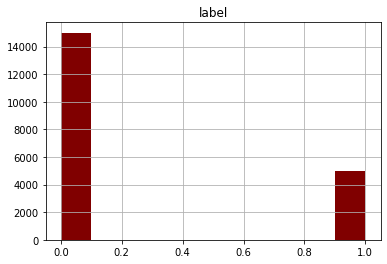

In [13]:
# Let's view the distribution of Labels 
new_labels.hist(['label'],color='maroon',bins=10)
plt.show()

In [14]:
# check number of trips labeled as dangerous
new_labels.label.value_counts()

0    14999
1     4983
Name: label, dtype: int64

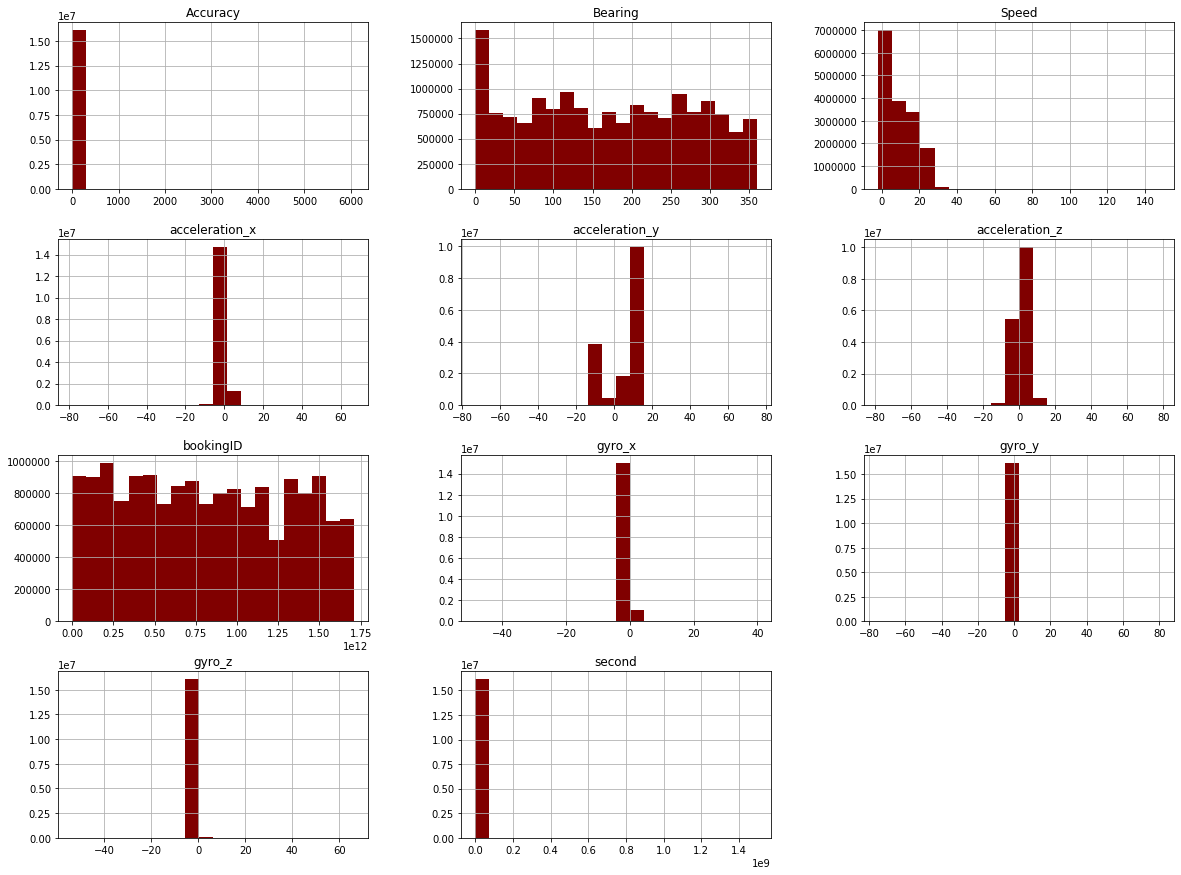

In [15]:
#Checking Distribution of the train set
train.hist(bins=20, figsize=(20,15),color='maroon')
plt.show()

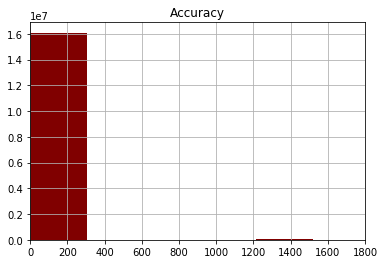

In [16]:
train.hist(['Accuracy'],color='maroon', bins=20)
plt.xlim(0,1800)
plt.show()

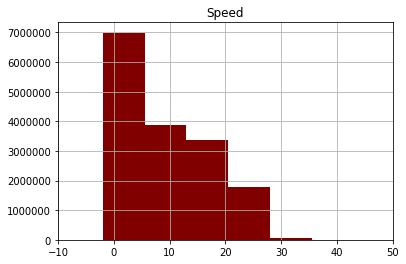

In [17]:
train.hist(['Speed'],color='maroon', bins=20)
plt.xlim(-10,50)
plt.show()

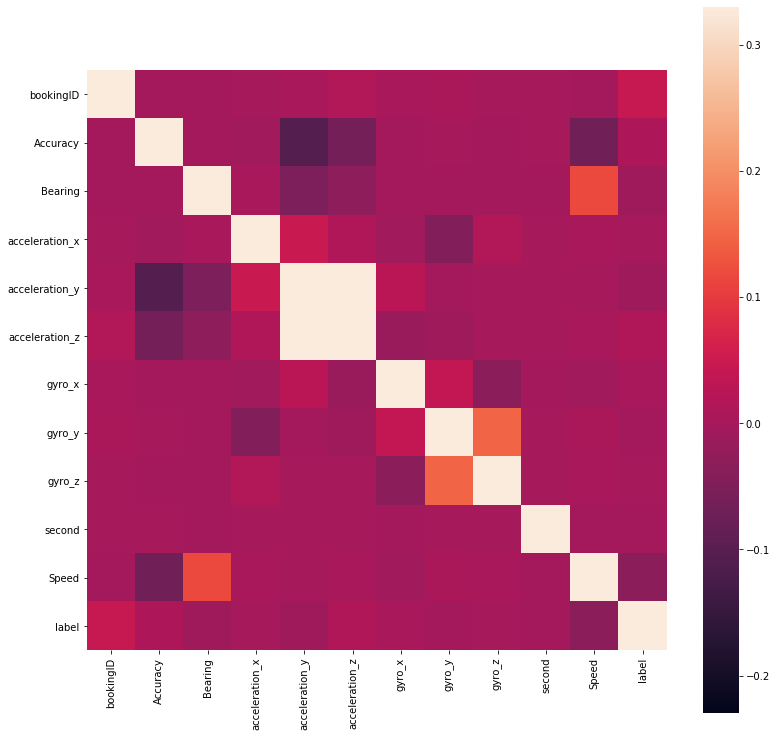

In [18]:
# Check correlation between the features
temp2 = pd.merge(train,new_labels,on="bookingID", how = 'inner')

corrmat = temp2.corr()
fig = plt.figure(figsize = (13, 13))

sns.heatmap(corrmat, vmax = .33, vmin=-0.23, square = True)
plt.show()

In [19]:
# double check to make sure that we got our temp data set to merge properly. 
# Also get a sense of how the telematics data looks like after we merge them with labels...
# randomly pick a booking ID (e.g. 88)- what we see is a second by second telematic information for 1 trip (with bookingID 88)

temp2 = temp2.sort_values(by=['bookingID','second']).reset_index(drop=True)
temp2[temp2.bookingID==88]

,bookingID,Accuracy,Bearing,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z,second,Speed,label
41650,88,10.0,20.475615,-0.524722,-8.043997,-5.570221,0.040487,-0.008759,-0.000973,0.0,15.380000,1
41651,88,10.0,19.443254,-0.117236,-8.392267,-5.579044,0.051186,-0.007709,-0.006278,1.0,15.220000,1
41652,88,10.0,18.429127,-0.321951,-8.276077,-5.447302,0.064863,-0.025008,0.011863,2.0,15.090000,1
41653,88,10.0,14.270370,1.575662,-8.030688,-5.268906,0.064947,0.015287,0.041959,3.0,14.600000,1
41654,88,10.0,9.910966,0.840543,-8.159589,-5.497397,0.010867,0.068960,0.039872,4.0,14.540000,1
41655,88,10.0,3.485504,0.750522,-8.100223,-7.192838,0.034054,0.038777,0.061196,5.0,14.120000,1
41656,88,10.0,356.968658,1.218869,-7.003226,-5.627643,0.134009,-0.035219,0.037697,6.0,13.170000,1
41657,88,10.0,353.886658,-0.038281,-7.832852,-6.186609,0.039472,0.017752,0.019442,7.0,12.220000,1
41658,88,10.0,351.798828,-0.581097,-8.301498,-7.406226,0.027804,0.025322,0.015161,8.0,11.510000,1
41659,88,10.0,351.798828,-2.193097,-8.060596,-5.526556,0.070986,-0.108984,-0.030154,9.0,9.990000,1


#### From the correlation matrix seems like telematics data has a very weak relationship with trips labelled as dangerous. Therefore, feature engineering will be needed to allow our machine learning models to make good predictions.

## Step 4 Feature Engineering and Selection

In [20]:
train.describe()

,bookingID,Accuracy,Bearing,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z,second,Speed
count,1.613556e+07,1.613556e+07,1.613556e+07,1.613556e+07,1.613556e+07,1.613556e+07,1.613556e+07,1.613556e+07,1.613556e+07,1.613556e+07,1.613556e+07
mean,8.184819e+11,1.161035e+01,1.689684e+02,6.914529e-02,4.468976e+00,8.942974e-01,-1.710847e-03,2.800733e-04,-2.569688e-04,3.803484e+03,9.006543e+00
std,4.952476e+11,8.691672e+01,1.072966e+02,1.424161e+00,8.130664e+00,3.251549e+00,1.445619e-01,3.400630e-01,1.480824e-01,1.436686e+06,8.106415e+00
min,0.000000e+00,7.500000e-01,0.000000e+00,-7.841969e+01,-7.299412e+01,-7.844842e+01,-4.845575e+01,-7.488861e+01,-5.355445e+01,0.000000e+00,-2.000000e+00
25%,3.779571e+11,3.900000e+00,7.800000e+01,-5.081238e-01,-2.022476e+00,-9.316101e-01,-2.678888e-02,-2.993851e-02,-1.876500e-02,2.410000e+02,1.020000e+00
50%,8.074539e+11,4.250000e+00,1.688700e+02,6.137085e-02,9.081485e+00,7.757450e-01,-6.432411e-04,2.645046e-04,-3.542004e-05,5.200000e+02,7.530000e+00
75%,1.254130e+12,8.000000e+00,2.629840e+02,6.350620e-01,9.709778e+00,2.750938e+00,2.330639e-02,3.143085e-02,1.823425e-02,8.630000e+02,1.548000e+01
max,1.709397e+12,6.070101e+03,3.599995e+02,6.687346e+01,7.505589e+01,7.805576e+01,3.983975e+01,8.031496e+01,6.630078e+01,1.495797e+09,1.480186e+02


#### Abnormal findings
negative speed and very high speed of 148m/s which translates to 532.8km.h
maximum accuracy of 6,070m in the dataset (which means that the vehicle could be up to 6070 meters away from what is indicated from the telematics data)
very long trips of 1.495797e+09 seconds

In [21]:
#Filter out telematics data with negative speeds and high speeds > 50m/s
temp3 = train [(train ['Speed'] > 0) & (train ['Speed'] <= 50)]
temp3.reset_index(drop=True)# Drop - Modify the DataFrame in place (do not create a new object).
print(train.shape)
print(temp3.shape)

(16135561, 11)
(13125856, 11)


In [22]:
# filter our telematics data with extremely large accuracy figures > 95 percentile. Accuracy is a misnomer, larger the accuracy, the less accurate.
temp3 = temp3.loc[(temp3.Accuracy <= np.percentile(train.Accuracy, 95))]
print(temp3.shape)

(12705355, 11)


In [23]:
print(train.shape)
print(len(train.bookingID.unique()))
print(temp3.shape)
print(len(temp3.bookingID.unique()))

(16135561, 11)
20000
(12705355, 11)
19949


In [24]:
temp4 = pd.DataFrame(temp3.groupby('bookingID').second.max()) # get a list of maximum seconds for booking ID
trips = temp4[(temp4['second'] <= 10800)] # identify trips which have max values > 10800 ~ 3 hours
temp3 = temp3[temp3['bookingID'].isin(trips.index.values)]
print(temp3.shape)

(12705355, 11)


#### Temp3 shape shows that there are no trips with > 3 hours after the first 2 filters were applied, so the 3rd filter had no impact. To double check using temp4.describe

In [25]:
temp4.describe()

,second
count,19949.000000
mean,908.506993
std,479.835371
min,0.000000
25%,554.000000
50%,840.000000
75%,1210.000000
max,8224.000000


#### We are left with 12705355 telematics points with 19949 booking IDs

#### Check to make sure that there are no more impossible speeds, impossible trip length and bad accuracy scores in our dataframe

In [26]:
temp3.describe()

,bookingID,Accuracy,Bearing,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z,second,Speed
count,1.270536e+07,1.270536e+07,1.270536e+07,1.270536e+07,1.270536e+07,1.270536e+07,1.270536e+07,1.270536e+07,1.270536e+07,1.270536e+07,1.270536e+07
mean,8.175950e+11,6.307389e+00,1.796865e+02,6.404545e-02,3.931055e+00,8.151467e-01,-2.169732e-03,1.055593e-03,-2.406042e-04,6.217850e+02,1.121959e+01
std,4.951206e+11,3.250190e+00,1.015382e+02,1.440806e+00,8.453829e+00,3.244637e+00,1.412319e-01,3.379690e-01,1.391004e-01,4.575102e+02,7.573651e+00
min,0.000000e+00,7.500000e-01,0.000000e+00,-7.841969e+01,-7.299412e+01,-6.737283e+01,-3.347175e+01,-7.488861e+01,-3.746538e+01,0.000000e+00,7.569697e-27
25%,3.779571e+11,3.900000e+00,9.200000e+01,-5.591156e-01,-8.112933e+00,-1.052136e+00,-3.284104e-02,-3.723472e-02,-2.260201e-02,2.610000e+02,4.411169e+00
50%,7.988639e+11,4.658000e+00,1.790000e+02,5.288610e-02,8.948928e+00,6.967340e-01,-1.281738e-03,9.424778e-04,-1.065264e-04,5.500000e+02,1.063840e+01
75%,1.254130e+12,8.000000e+00,2.680000e+02,6.780140e-01,9.702502e+00,2.681506e+00,2.863271e-02,3.974129e-02,2.214325e-02,8.910000e+02,1.725517e+01
max,1.709397e+12,1.600000e+01,3.599995e+02,4.770832e+01,7.505589e+01,7.805576e+01,3.983975e+01,8.031496e+01,4.505986e+01,8.224000e+03,4.280735e+01


#### Add new variables using our limited domain knowledge

In [27]:
temp3 ['Resultant Acceleration'] = np.sqrt ((temp3['acceleration_x'])**2 + (temp3['acceleration_y'])**2 + (temp3['acceleration_z'])**2)
temp3.shape

(12705355, 12)

In [28]:
temp3 ['Resultant gyro'] = np.sqrt ((temp3['gyro_x'])**2 + (temp3['gyro_y'])**2 + (temp3['gyro_z'])**2)
temp3.shape

(12705355, 13)

In [29]:
temp3 ['Resultant Acc & Gyro'] = temp3 ['Resultant Acceleration'] * temp3 ['Resultant gyro']
temp3.shape

(12705355, 14)

In [30]:
temp3 ['harsh_yaw'] = temp3 ['gyro_x'] * temp3 ['Speed']
temp3.shape

(12705355, 15)

In [31]:
temp3 ['harsh_pitch'] = temp3 ['gyro_z'] * temp3 ['Speed']
temp3.shape

(12705355, 16)

In [32]:
temp3.head(5)

,bookingID,Accuracy,Bearing,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z,second,Speed,Resultant Acceleration,Resultant gyro,Resultant Acc & Gyro,harsh_yaw,harsh_pitch
1,274877907034,9.293,17.0,0.032775,8.659933,4.737300,0.024629,0.004028,-0.010858,257.0,0.190000,9.871045,0.027216,0.268653,0.004680,-0.002063
2,884763263056,3.000,189.0,1.139675,9.545974,1.951334,-0.006899,-0.015080,0.001122,973.0,0.667059,9.809800,0.016622,0.163054,-0.004602,0.000748
3,1073741824054,3.900,126.0,3.871543,10.386364,-0.136474,0.001344,-0.339601,-0.017956,902.0,7.913285,11.085307,0.340078,3.769874,0.010635,-0.142094
4,1056561954943,3.900,50.0,-0.112882,10.550960,-1.560110,0.130568,-0.061697,0.161530,820.0,20.419409,10.666276,0.216672,2.311080,2.666123,3.298352
5,1185410973787,3.900,178.0,0.805649,9.206902,2.954445,-0.057104,-0.043555,0.002334,533.0,19.250000,9.702828,0.071856,0.697207,-1.099246,0.044920


In [33]:
columns_to_drop = ['acceleration_x','acceleration_y','acceleration_z','gyro_x','gyro_y','gyro_z']
temp3.drop(columns_to_drop, axis = 1, inplace = True)
temp3.shape

(12705355, 10)

In [34]:
#Normalize data before further processing
columns_to_norm = temp3.drop(['bookingID'], axis=1).columns
temp3[columns_to_norm] = MinMaxScaler().fit_transform(temp3[columns_to_norm])
temp3.shape

(12705355, 10)

#### we create new variables from all the existing telematics data - mean, standard deviation, minimum, maximum, sum, variance

In [35]:
df_mean = temp3.groupby('bookingID').mean().add_prefix('mean_')
df_std = temp3.groupby('bookingID').std().add_prefix('std_')
df_min = temp3.groupby('bookingID').min().add_prefix('min_')
df_max = temp3.groupby('bookingID').max().add_prefix('max_')
df_sum = temp3.groupby('bookingID').sum().add_prefix('sum_')
df_var = temp3.groupby('bookingID').var().add_prefix('var_')

In [36]:
df_1 = pd.merge(df_mean, df_std, on = 'bookingID', how = 'inner')
df_2 = pd.merge(df_min, df_max, on = 'bookingID', how = 'inner')
df_3 = pd.merge(df_sum, df_var, on = 'bookingID', how = 'inner')
df_4 = pd.merge(df_1, df_2, on = 'bookingID', how = 'inner')
train_df = pd.merge(df_4, df_3, on = 'bookingID', how = 'inner')

In [37]:
train_df = train_df.dropna() #drop any row that has a missing value.

In [38]:
train_df['Total Distance'] = train_df['mean_Speed'] * train_df['max_second']
train_df['Velocity'] = np.sqrt( 2 * df_mean['mean_Resultant Acceleration'] * train_df['Total Distance'] )

In [39]:
train_df.shape

(19946, 56)

In [40]:
#Merge Train data with Labels, dropping telematics data without label.
train = pd.merge(train_df, new_labels, on = 'bookingID', how = 'inner')
train.shape

(19928, 58)

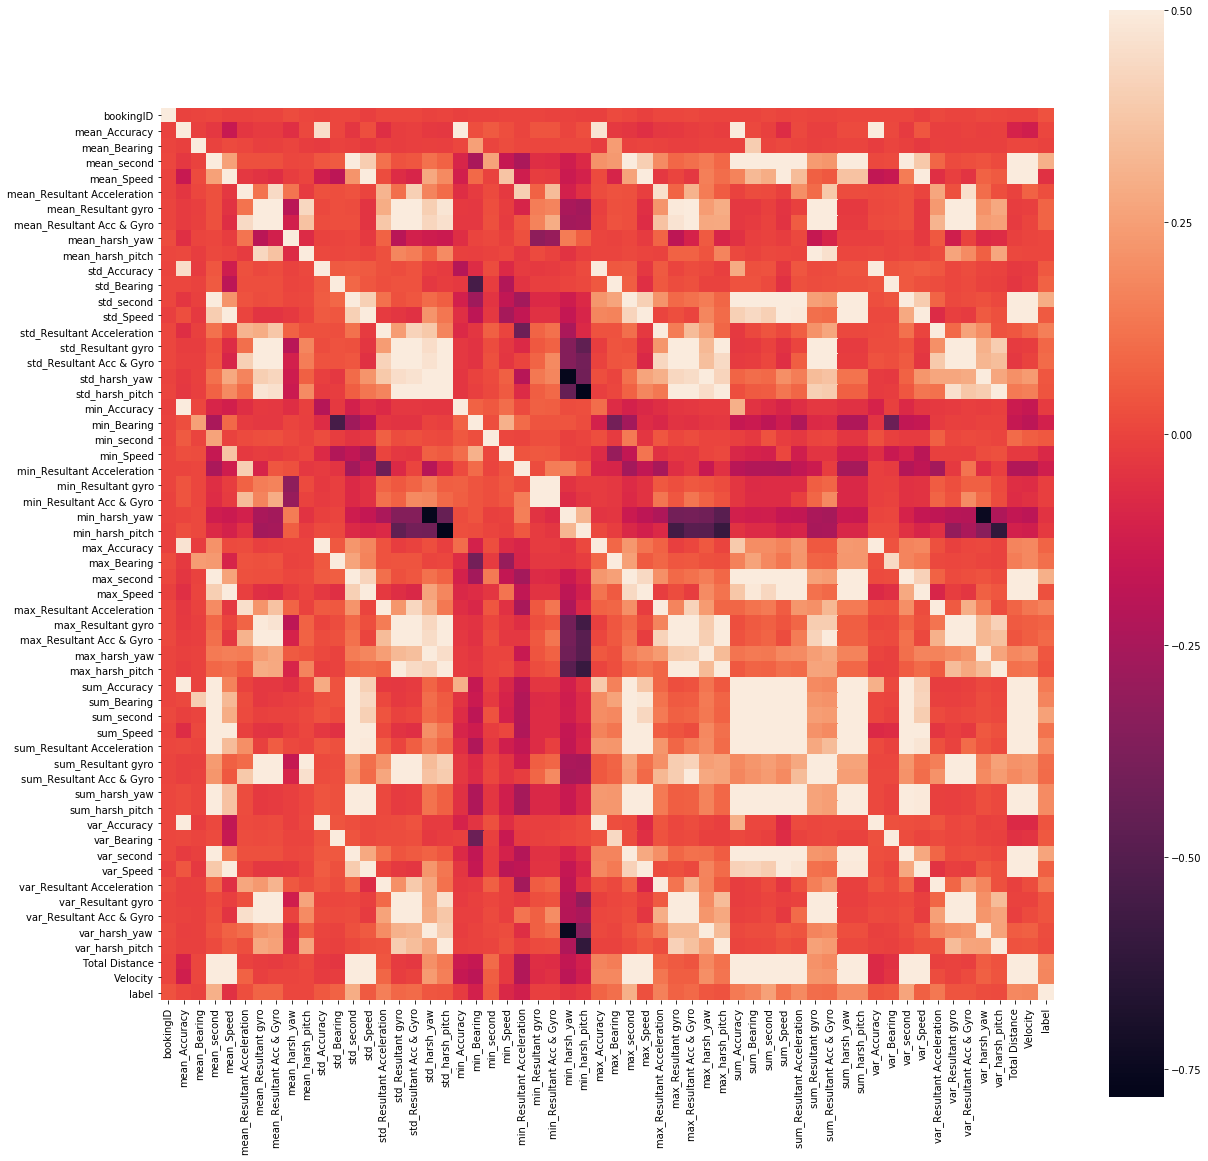

In [41]:
# Check correlation between the features
corrmat = train.corr()
fig = plt.figure(figsize = (20, 20))
sns.heatmap(corrmat, vmax = 0.5, square = True)
plt.show()

#### there seems to be a slight improvement in correlation scores between variables and the label, although they still seem low

In [42]:
#final check before regression
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19928 entries, 0 to 19927
Data columns (total 58 columns):
bookingID                      19928 non-null int64
mean_Accuracy                  19928 non-null float64
mean_Bearing                   19928 non-null float64
mean_second                    19928 non-null float64
mean_Speed                     19928 non-null float64
mean_Resultant Acceleration    19928 non-null float64
mean_Resultant gyro            19928 non-null float64
mean_Resultant Acc & Gyro      19928 non-null float64
mean_harsh_yaw                 19928 non-null float64
mean_harsh_pitch               19928 non-null float64
std_Accuracy                   19928 non-null float64
std_Bearing                    19928 non-null float64
std_second                     19928 non-null float64
std_Speed                      19928 non-null float64
std_Resultant Acceleration     19928 non-null float64
std_Resultant gyro             19928 non-null float64
std_Resultant Acc & Gyro     

## Step 4 : Machine Learning and Modelling

#### We will use the following models: RandomForestClassifier, GradientBoostingClassifier, LogisticRegression, GaussianNB and XGBClassifier

#### first, to define test and training data

In [67]:
X = train.drop(['bookingID','label'],axis =1)
y = train['label']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=8)

In [68]:
print(X_train.shape, X_test.shape)

(13949, 56) (5979, 56)


In [69]:
rf = RandomForestClassifier(random_state=53, n_jobs=-1,n_estimators=100, max_depth=3)
log = LogisticRegression(random_state=53,n_jobs=-1,solver='lbfgs')
gnb = GaussianNB()
xgbmodel = xgb.XGBClassifier (random_state=53, n_jobs=-1, learning_rate=0.05,n_estimators=100, max_depth=4)
gbc = GradientBoostingClassifier (random_state=53,n_estimators=100,learning_rate=0.05)

models = [rf,log,gnb,xgbmodel,gbc]

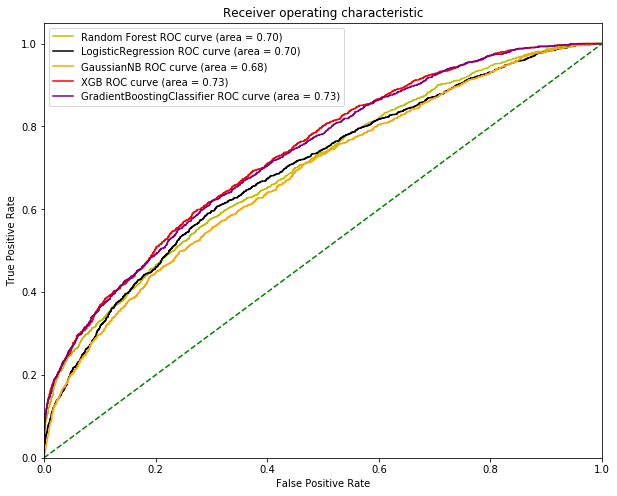

In [70]:
plt.figure(figsize=(10, 8))

#RandomForest
models[0].fit(X_train,y_train)
pred1 = models[0].predict_proba(X_test)[:,1]
y_pred1 = rf.predict(X_test)
rf_acc = metrics.accuracy_score (y_test,y_pred1)
rf_auc = metrics.roc_auc_score(y_test,pred1)
fpr, tpr, _ = metrics.roc_curve(y_test, pred1)
plt.plot(fpr, tpr, color='y', label='Random Forest ROC curve (area = %0.2f)' % rf_auc)

#LogisticRegression
models[1].fit(X_train,y_train)
pred2 = models[1].predict_proba(X_test)[:,1]
y_pred2 = log.predict(X_test)
log_acc = metrics.accuracy_score (y_test,y_pred2)
log_auc = metrics.roc_auc_score(y_test,pred2)
fpr, tpr, _ = metrics.roc_curve(y_test, pred2)
plt.plot(fpr, tpr, color='black', label='LogisticRegression ROC curve (area = %0.2f)' % log_auc)

#GaussianNB
models[2].fit(X_train,y_train)
pred3 = models[2].predict_proba(X_test)[:,1]
y_pred3 = gnb.predict(X_test)
gnb_acc = metrics.accuracy_score (y_test,y_pred3)
gnb_auc = metrics.roc_auc_score(y_test,pred3)
fpr, tpr, _ = metrics.roc_curve(y_test, pred3)
plt.plot(fpr, tpr, color='orange', label='GaussianNB ROC curve (area = %0.2f)' % gnb_auc)

#XGb
models[3].fit(X_train,y_train)
y_pred4 = models[3].predict(X_test)
y_prob = models[3].predict_proba(X_test)
pred4 = y_prob[:,1]
xgb_acc = metrics.accuracy_score (y_test,y_pred4)
xgb_auc = metrics.roc_auc_score(y_test,pred4)
fpr, tpr, _ = metrics.roc_curve(y_test, pred4)
plt.plot(fpr, tpr, color='r', label='XGB ROC curve (area = %0.2f)' % xgb_auc)

#GradientBoostingClassifier
models[4].fit(X_train,y_train)
pred5 = models[4].predict_proba(X_test)[:,1]
y_pred5 = gbc.predict(X_test)
gbc_acc = metrics.accuracy_score (y_test,y_pred5)
gbc_auc = metrics.roc_auc_score(y_test,pred5)
fpr, tpr, _ = metrics.roc_curve(y_test, pred5)
plt.plot(fpr, tpr, color='purple', label='GradientBoostingClassifier ROC curve (area = %0.2f)' % gbc_auc)

plt.plot([0, 1], [0, 1], color='g', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')

plt.legend(loc=0)

In [71]:
print('rf Model ACC \t\t\t', rf_acc)
print('log Model ACC \t\t\t', log_acc)
print('gnb Model ACC \t\t\t', gnb_acc)
print('xgb Model ACC \t\t\t', xgb_acc)
print('gbc Model ACC \t\t\t', gbc_acc)

rf Model ACC 			 0.7757150025087808
log Model ACC 			 0.7666833918715504
gnb Model ACC 			 0.7240341194179629
xgb Model ACC 			 0.7839103529018231
gbc Model ACC 			 0.7845793610971734


In [72]:
# rf,log,gnb,xgb,gbc
print('rf Model AUC \t\t\t', rf_auc)
print('log Model AUC \t\t\t', log_auc)
print('gnb Model AUC \t\t\t', gnb_auc)
print('xgb Model AUC \t\t\t', xgb_auc)
print('gbc Model AUC \t\t\t', gbc_auc)

rf Model AUC 			 0.6982708687785412
log Model AUC 			 0.6952445029432021
gnb Model AUC 			 0.6804130081612965
xgb Model AUC 			 0.7338525081408994
gbc Model AUC 			 0.7296925205712188


In [73]:
# classification Report for XGB
print(classification_report(y_test, y_pred4))

              precision    recall  f1-score   support

           0       0.79      0.98      0.87      4496
           1       0.74      0.20      0.31      1483

    accuracy                           0.78      5979
   macro avg       0.76      0.59      0.59      5979
weighted avg       0.78      0.78      0.73      5979



In [74]:
# classification Report for GBC
print(classification_report(y_test, y_pred5))

              precision    recall  f1-score   support

           0       0.79      0.98      0.87      4496
           1       0.75      0.19      0.31      1483

    accuracy                           0.78      5979
   macro avg       0.77      0.59      0.59      5979
weighted avg       0.78      0.78      0.73      5979



In [75]:
# Precision is the fraction of predicted positives events that are actually positive
# Recall (also known as sensitivity) is the fraction of positives events that you predicted correctly
# The f1 score is the harmonic mean of recall and precision, with a higher score as a better model

#### Recall 0.19 for dangerous driving is low (i.e label = 1) which means the model performed poorly in predicting dangerous driving

In [76]:
# Confusion Matrix for XGB
print(confusion_matrix(y_test, y_pred4))

[[4394  102]
 [1190  293]]


In [77]:
# Confusion Matrix for GBC
print(confusion_matrix(y_test, y_pred5))

[[4402   94]
 [1194  289]]


In [78]:
y_train.value_counts()

0    10470
1     3479
Name: label, dtype: int64

In [79]:
# 25% of the test data is label as dangerous driving potetntial causing an imbalance dataset (75:25)

### SMOTE (Synthetic Minority Over-sampling Technique)

In [80]:
smt = SMOTE()
X_train1, y_train1 = smt.fit_sample(X_train, y_train)

In [81]:
np.bincount(y_train1)

array([10470, 10470], dtype=int64)

#### Both categories have equal amount of records. More specifically, the minority class has been increased to the total number of majority class.

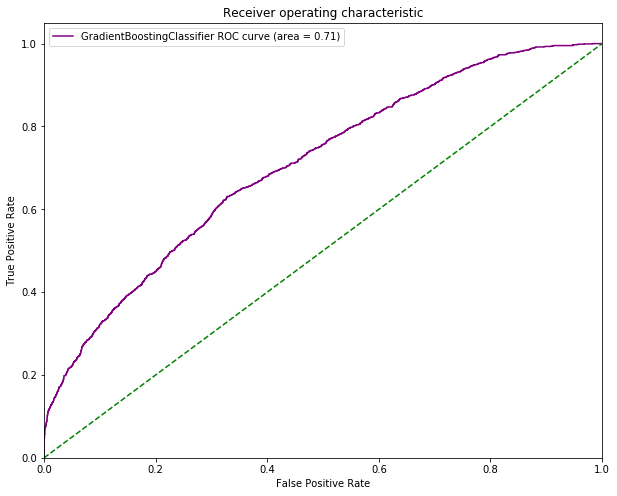

In [82]:
plt.figure(figsize=(10, 8))

#GradientBoostingClassifier
models[4].fit(X_train1,y_train1)
pred6 = models[4].predict_proba(X_test)[:,1]
y_pred6 = gbc.predict(X_test)
gbc_acc2 = metrics.accuracy_score (y_test,y_pred6)
gbc_auc2 = metrics.roc_auc_score(y_test,pred6)
fpr, tpr, _ = metrics.roc_curve(y_test, pred6)
plt.plot(fpr, tpr, color='purple', label='GradientBoostingClassifier ROC curve (area = %0.2f)' % gbc_auc2)

plt.plot([0, 1], [0, 1], color='g', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')

plt.legend(loc=0)

In [90]:
print('gbc Model ACC \t\t\t', gbc_acc2)
print('gbc Model AUC \t\t\t', gbc_auc2)

gbc Model ACC 			 0.696103027262084
gbc Model AUC 			 0.706391145917072


In [84]:
print(classification_report(y_test, y_pred6))

              precision    recall  f1-score   support

           0       0.83      0.75      0.79      4496
           1       0.41      0.52      0.46      1483

    accuracy                           0.70      5979
   macro avg       0.62      0.64      0.62      5979
weighted avg       0.72      0.70      0.71      5979



In [85]:
print(confusion_matrix(y_test, y_pred6))

[[3391 1105]
 [ 712  771]]


### Parameter Tuning

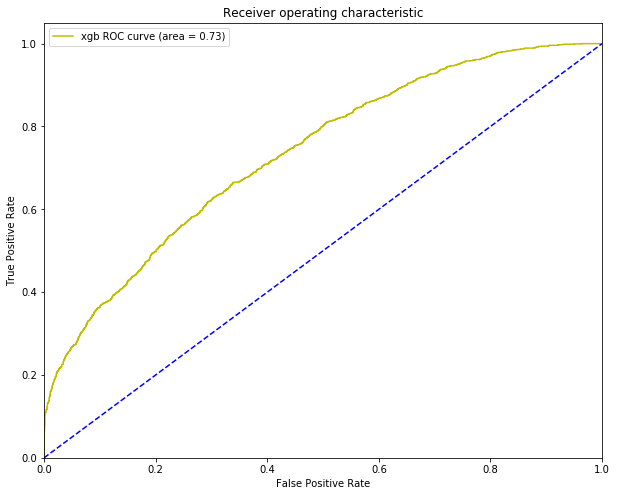

In [86]:
#Changing setting in Algo
xgbmodel = xgb.XGBClassifier (random_state=53, n_jobs=-1, learning_rate=0.05,n_estimators=100, max_depth=4,scale_pos_weight=3)

# xgb Only # 
plt.figure(figsize=(10, 8))
xgbmodel.fit(X_train,y_train)
pred7 = xgbmodel.predict_proba(X_test)[:,1]
y_pred7 = xgbmodel.predict(X_test)
xgb_acc2 = metrics.accuracy_score(y_test,y_pred7)
xgb_auc2 = metrics.roc_auc_score(y_test,pred7)

fpr, tpr, _ = metrics.roc_curve(y_test, pred7)
plt.plot(fpr, tpr, color='y', label='xgb ROC curve (area = %0.2f)' % xgb_auc)

plt.plot([0, 1], [0, 1], color='b', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')

plt.legend(loc=0)

In [87]:
print('xgb Model ACC \t\t\t', xgb_acc2)
print('xgb Model AUC \t\t\t', xgb_auc2)

xgb Model ACC 			 0.68523164408764
xgb Model AUC 			 0.7338113387070069


In [88]:
print(classification_report(y_test, y_pred7))

              precision    recall  f1-score   support

           0       0.85      0.71      0.77      4496
           1       0.41      0.61      0.49      1483

    accuracy                           0.69      5979
   macro avg       0.63      0.66      0.63      5979
weighted avg       0.74      0.69      0.70      5979



In [89]:
print(confusion_matrix(y_test, y_pred7))

[[3190 1306]
 [ 576  907]]
